<a href="https://colab.research.google.com/github/zrsteff/CSC587/blob/main/Lab%2015%20-%20LabClusterEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score

#Dataset creation with sklearn tools (make_blobs)

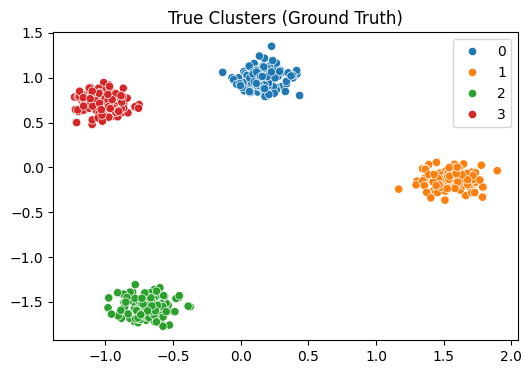

In [2]:
# Create blob-like data with clear clusters. Please note that these are perfect clusters with create.
#So, the clustering structure will be obvious to the algorithms

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the true clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.title("True Clusters (Ground Truth)")
plt.show()

#Using elbow method to determine the number of cluster

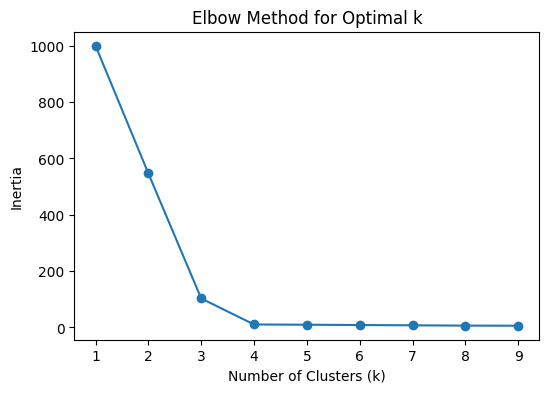

In [3]:
inertia = [] #Inertia is the sum of squared distances from each point to its assigned cluster center.
#inertia is a metric that measures how internally coherent the clusters are


K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#Apply both k-means and DBScan on the same data. Please note that DBSCAN doesn't require the number of clusters, but it asks epsilon and min_samples (min points)

In [4]:
# Best guess from elbow method (should be 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Let's visualize both clustering outputs

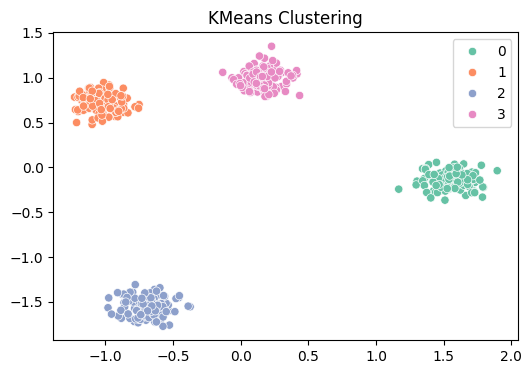

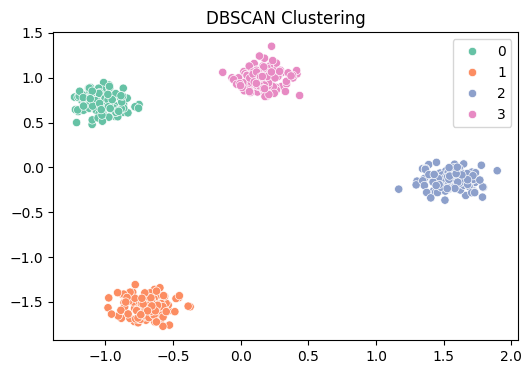

In [5]:
# Visualize KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

#Adjusted Rand Index calculations

In [6]:
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 1.0
Adjusted Rand Index (DBSCAN): 1.0


#Can you do the same experiment with iris data?

In [7]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Separate features (X_iris) and target labels (y_iris)
X_iris = iris.data
y_iris = iris.target

print("Iris dataset loaded successfully.")
print(f"Shape of X_iris: {X_iris.shape}")
print(f"Shape of y_iris: {y_iris.shape}")

Iris dataset loaded successfully.
Shape of X_iris: (150, 4)
Shape of y_iris: (150,)


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the Iris features
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

print("Iris features scaled successfully.")
print(f"Shape of X_iris_scaled: {X_iris_scaled.shape}")

Iris features scaled successfully.
Shape of X_iris_scaled: (150, 4)


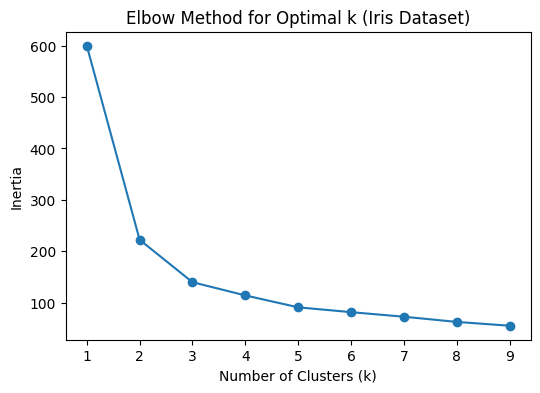

In [9]:
inertia_iris = []
K_range_iris = range(1, 10)

for k in K_range_iris:
    kmeans_iris = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for reproducibility and to suppress warning
    kmeans_iris.fit(X_iris_scaled)
    inertia_iris.append(kmeans_iris.inertia_)

# Plot elbow curve for Iris
plt.figure(figsize=(6, 4))
plt.plot(K_range_iris, inertia_iris, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Iris Dataset)')
plt.show()

In [10]:
from sklearn.cluster import KMeans, DBSCAN

# Apply KMeans with the optimal number of clusters (3 for Iris)
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_iris_labels = kmeans_iris.fit_predict(X_iris_scaled)

# Apply DBSCAN (tune these parameters based on the dataset characteristics)
# For Iris, common values are eps around 0.5-0.6 and min_samples 5-10 for good separation
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
dbscan_iris_labels = dbscan_iris.fit_predict(X_iris_scaled)

print("KMeans and DBSCAN applied to Iris dataset.")
print(f"KMeans labels shape: {kmeans_iris_labels.shape}")
print(f"DBSCAN labels shape: {dbscan_iris_labels.shape}")

KMeans and DBSCAN applied to Iris dataset.
KMeans labels shape: (150,)
DBSCAN labels shape: (150,)


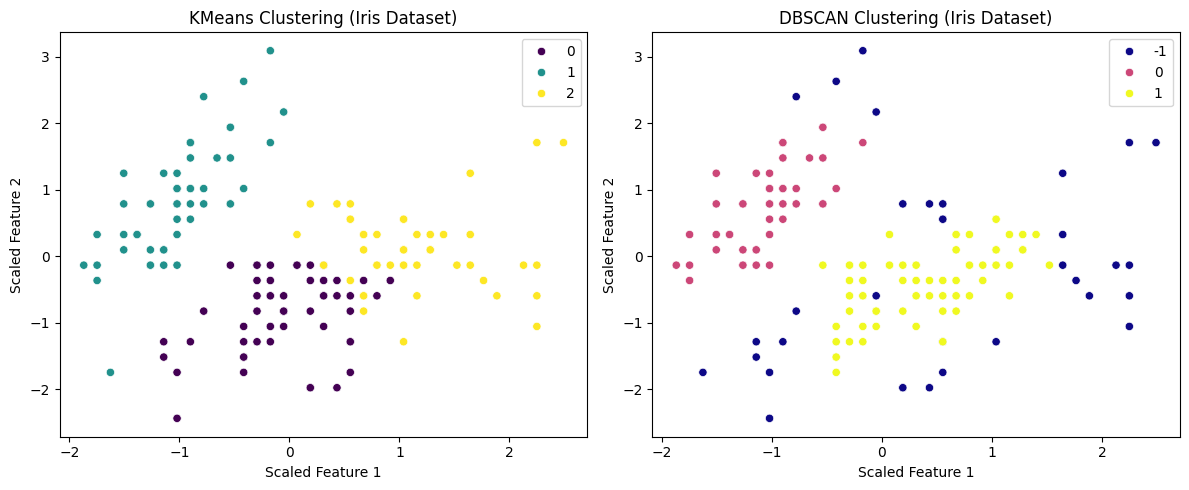

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize KMeans results for Iris
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # Create a subplot for KMeans
sns.scatterplot(x=X_iris_scaled[:, 0], y=X_iris_scaled[:, 1], hue=kmeans_iris_labels, palette='viridis', legend='full')
plt.title('KMeans Clustering (Iris Dataset)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Visualize DBSCAN results for Iris
plt.subplot(1, 2, 2) # Create a subplot for DBSCAN
sns.scatterplot(x=X_iris_scaled[:, 0], y=X_iris_scaled[:, 1], hue=dbscan_iris_labels, palette='plasma', legend='full')
plt.title('DBSCAN Clustering (Iris Dataset)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Index for KMeans
ari_kmeans_iris = adjusted_rand_score(y_iris, kmeans_iris_labels)

# Calculate Adjusted Rand Index for DBSCAN
ari_dbscan_iris = adjusted_rand_score(y_iris, dbscan_iris_labels)

print("Adjusted Rand Index (KMeans for Iris):", ari_kmeans_iris)
print("Adjusted Rand Index (DBSCAN for Iris):", ari_dbscan_iris)

Adjusted Rand Index (KMeans for Iris): 0.6201351808870379
Adjusted Rand Index (DBSCAN for Iris): 0.4420986685885924
